<a href="https://colab.research.google.com/github/SarahSouzaPontes/classificacao_multiclassses_prob_saude_redistribuicaoprofissionais/blob/main/Classificacao_Multiclasses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/fetal_health.csv")
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


PROBLEMA DE SAÚDE => DIRECIONAR RECURSO

SEPARAÇÃO DE VAR PREDITIVA E RESPOSTA

In [ ]:
X= df.drop('fetal_health', axis =1 )
y= df.fetal_health

In [ ]:
y.value_counts()
#1655 fetos sao saudáveis
#doentes  295
#suspeitos 176

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [ ]:
y.value_counts()/y.shape[0]

1.0    0.778457
2.0    0.138758
3.0    0.082785
Name: fetal_health, dtype: float64

In [ ]:
#Div em treino e teste
from sklearn.model_selection import train_test_split
X_tr, X_ts, y_tr, y_ts = train_test_split(X,y, test_size = 0.30)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators = 1_000, max_depth = 8, n_jobs = -1)

In [ ]:
rf.fit(X_tr, y_tr)

RandomForestClassifier(max_depth=8, n_estimators=1000, n_jobs=-1)

In [ ]:
rf.predict_proba(X_ts)

array([[0.88013478, 0.11327419, 0.00659103],
       [0.97859046, 0.0197176 , 0.00169195],
       [0.28675022, 0.69290494, 0.02034484],
       ...,
       [0.03652938, 0.03081395, 0.93265667],
       [0.18035556, 0.77714009, 0.04250435],
       [0.87040567, 0.12706775, 0.00252658]])

In [ ]:
pd.DataFrame(rf.predict_proba(X_ts), columns= [
    'Score Saudável',
    'Score Suspeito',
    'Não Doente'
])

,Score Saudável,Score Suspeito,Não Doente
0,0.880135,0.113274,0.006591
1,0.978590,0.019718,0.001692
2,0.286750,0.692905,0.020345
3,0.968606,0.020415,0.010979
4,0.938675,0.014335,0.046990
...,...,...,...
633,0.016359,0.004232,0.979409
634,0.235632,0.672065,0.092303
635,0.036529,0.030814,0.932657
636,0.180356,0.777140,0.042504


In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_ts==1, rf.predict_proba(X_ts)[:,0])
#saudável

0.9797520598224211

In [ ]:
roc_auc_score(y_ts==2, rf.predict_proba(X_ts)[:,1])
#suspeito

0.9670362903225805

In [ ]:
roc_auc_score(y_ts==3, rf.predict_proba(X_ts)[:,2])
#doente

0.9992030768164651

(array([5.59689922, 2.0620155 , 3.09302326, 1.47286822, 0.44186047,
        1.17829457, 0.44186047, 0.58914729, 0.14728682, 0.44186047,
        0.58914729, 0.29457364, 0.58914729, 0.73643411, 0.29457364,
        0.29457364, 0.        , 0.44186047, 0.29457364]),
 array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
        0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
        0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
        0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
 <BarContainer object of 19 artists>)

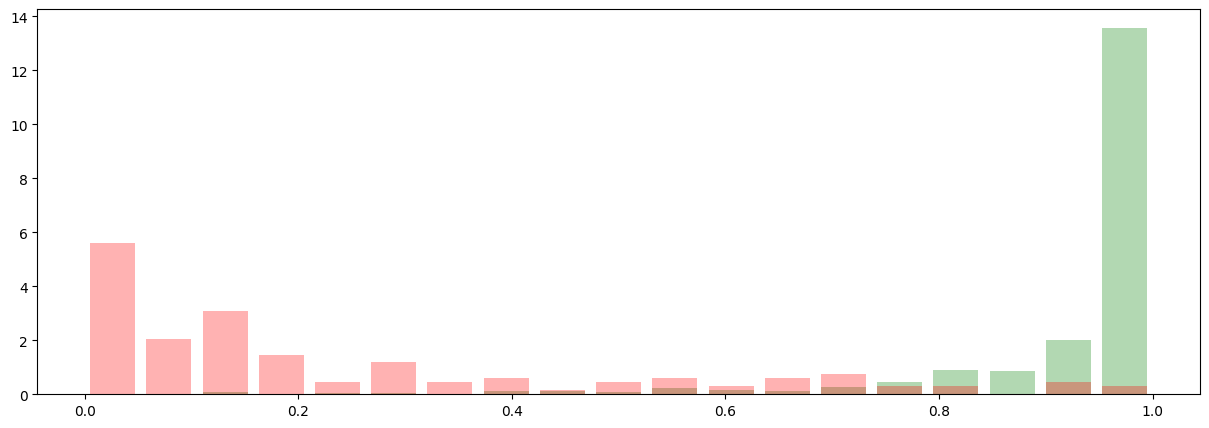

In [ ]:
pred_saudavel= rf.predict_proba(X_ts)[:,0]
pred_suspeito= rf.predict_proba(X_ts)[:,1]
pred_doente= rf.predict_proba(X_ts)[:,2]

bins = np.linspace(0,1,20)

plt.figure(figsize=(15,5))
plt.hist(pred_saudavel[y_ts ==1], bins, density = True, color= 'g', alpha = .3, rwidth= .8)
plt.hist(pred_saudavel[y_ts!=1], bins, density = True, color= 'r', alpha = .3, rwidth= .8)

Text(0.5, 1.0, 'Score Saudável')

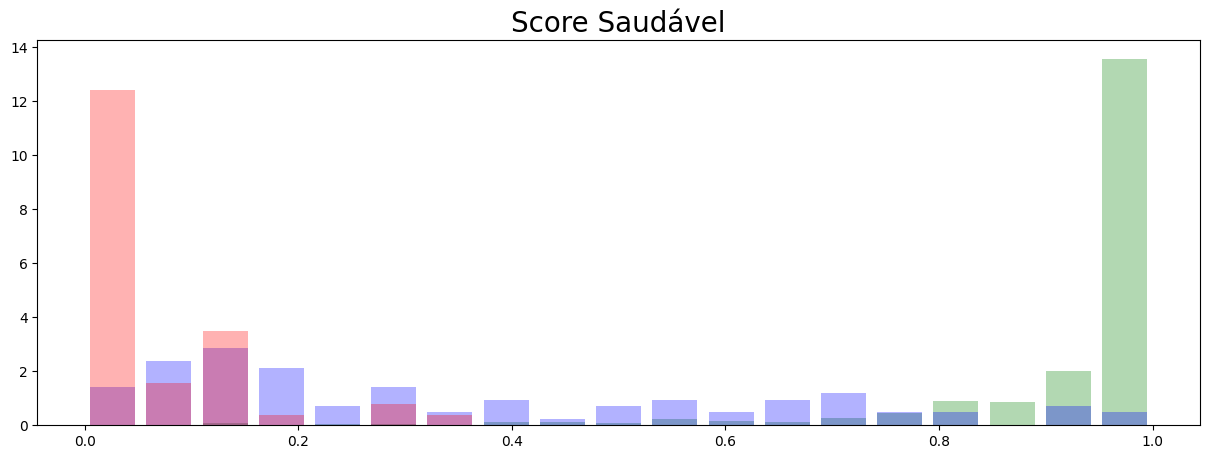

In [ ]:
pltpred_saudavel= rf.predict_proba(X_ts)[:,0]
pred_suspeito= rf.predict_proba(X_ts)[:,1]
pred_doente= rf.predict_proba(X_ts)[:,2]

bins = np.linspace(0,1,20)

plt.figure(figsize=(15,5))
plt.hist(pred_saudavel[y_ts ==1], bins, density = True, color= 'g', alpha = .3, rwidth= .8)
plt.hist(pred_saudavel[y_ts==2], bins, density = True, color= 'b', alpha = .3, rwidth= .8)
plt.hist(pred_saudavel[y_ts==3], bins, density = True, color= 'r', alpha = .3, rwidth= .8)
plt.title('Score Saudável', fontsize = 20)

Text(0.5, 1.0, 'Score Suspeito')

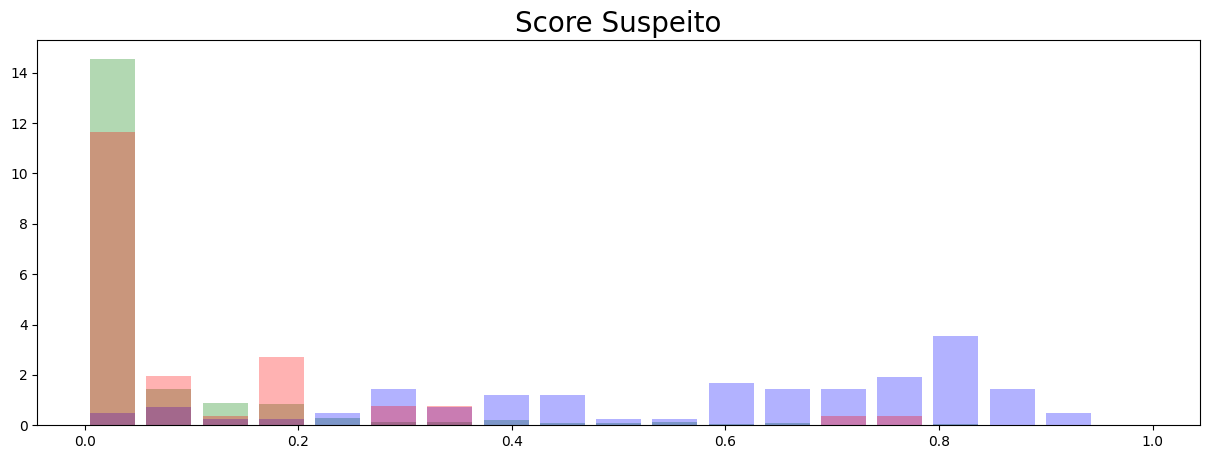

In [ ]:
pltpred_saudavel= rf.predict_proba(X_ts)[:,0]
pred_suspeito= rf.predict_proba(X_ts)[:,1]
pred_doente= rf.predict_proba(X_ts)[:,2]

bins = np.linspace(0,1,20)

plt.figure(figsize=(15,5))
plt.hist(pred_suspeito[y_ts ==1], bins, density = True, color= 'g', alpha = .3, rwidth= .8)
plt.hist(pred_suspeito[y_ts==2], bins, density = True, color= 'b', alpha = .3, rwidth= .8)
plt.hist(pred_suspeito[y_ts==3], bins, density = True, color= 'r', alpha = .3, rwidth= .8)
plt.title('Score Suspeito', fontsize = 20)

Text(0.5, 1.0, 'Score Doente')

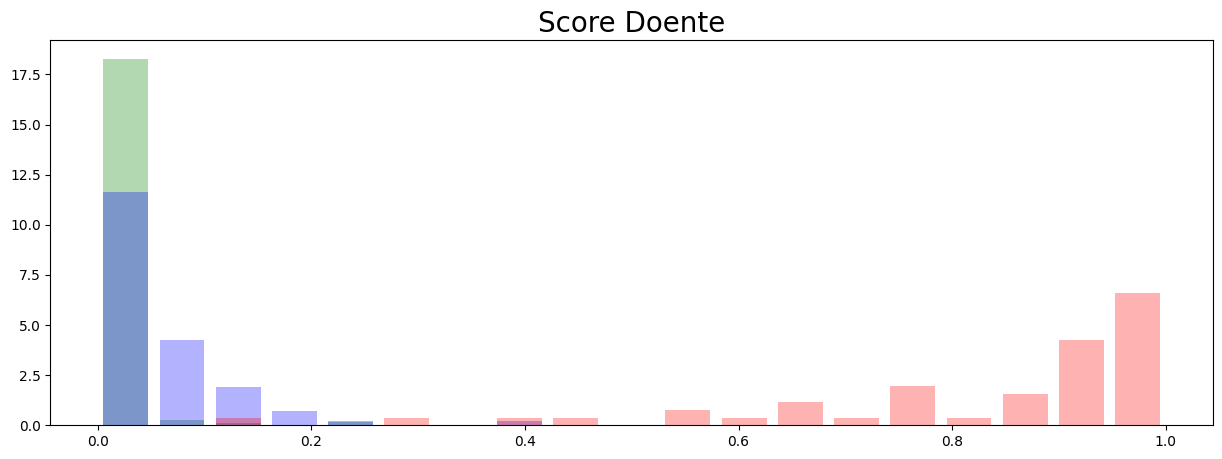

In [ ]:
pltpred_saudavel= rf.predict_proba(X_ts)[:,0]
pred_suspeito= rf.predict_proba(X_ts)[:,1]
pred_doente= rf.predict_proba(X_ts)[:,2]

bins = np.linspace(0,1,20)

plt.figure(figsize=(15,5))
plt.hist(pred_doente[y_ts ==1], bins, density = True, color= 'g', alpha = .3, rwidth= .8)
plt.hist(pred_doente[y_ts==2], bins, density = True, color= 'b', alpha = .3, rwidth= .8)
plt.hist(pred_doente[y_ts==3], bins, density = True, color= 'r', alpha = .3, rwidth= .8)
plt.title('Score Doente', fontsize = 20)

Text(0.5, 1.0, 'Público Saudável')

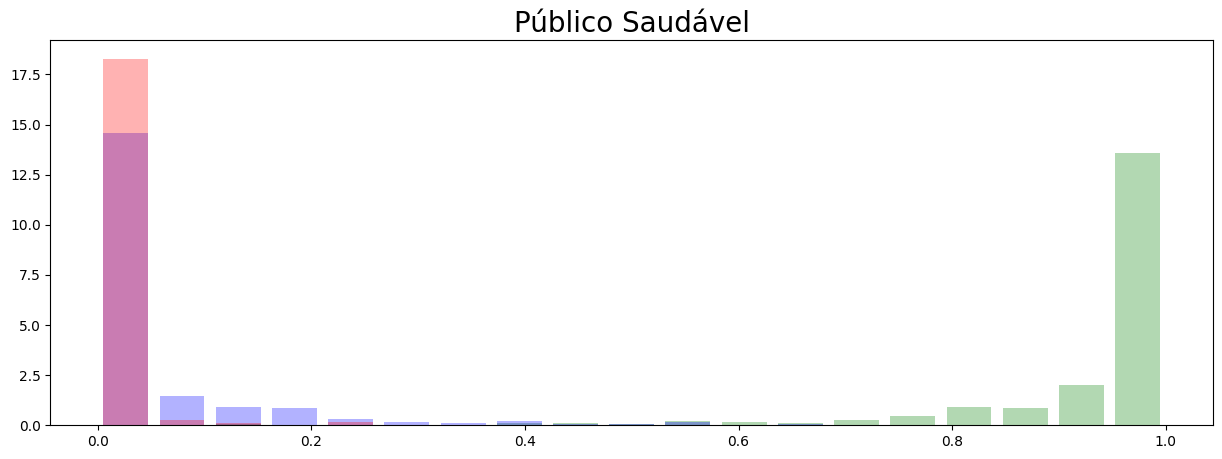

In [ ]:
pltpred_saudavel= rf.predict_proba(X_ts)[:,0]
pred_suspeito= rf.predict_proba(X_ts)[:,1]
pred_doente= rf.predict_proba(X_ts)[:,2]

bins = np.linspace(0,1,20)

plt.figure(figsize=(15,5))
plt.hist(pred_saudavel[y_ts ==1], bins, density = True, color= 'g', alpha = .3, rwidth= .8)
plt.hist(pred_suspeito[y_ts==1], bins, density = True, color= 'b', alpha = .3, rwidth= .8)
plt.hist(pred_doente[y_ts==1], bins, density = True, color= 'r', alpha = .3, rwidth= .8)
plt.title('Público Saudável', fontsize = 20)